## 1. Import and install dependencies

In [ ]:
# !pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

cv2 (OpenCV) – A library for image and video processing.

NumPy – A library for efficient numerical computations and large-scale data processing.

Matplotlib (pyplot) – A library for data visualization and plotting.

MediaPipe – A library for real-time hand, face, and body detection.

time – A library for measuring execution time and handling time-related operations.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp
import time
import os

## 2. Accessing webcam using open cv and using holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION (OPENCV)BGR TO (MEDIAPIPE)RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION (MEDIAPIPE)RGB TO (OPENCV)BGR
    return image, results

In [4]:
def draw_styled_landmarks(image, results):
    # Draw face full mask
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw face contours
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [109]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
    
        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen 
        cv2.imshow('OpenCV Feed', image)
    
        # Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 3. Extract keypoints 

In [5]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

dzien 

dobry

kochać

cię

do 

widzenia



In [45]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('PJM_Data') 

# Actions that we try to detect
actions = np.array(['dzien', 'dobry', 'kocham', 'ciebie', 'do', 'widziec'])

# Thirty videos worth of data
no_sequences = 15

# Videos are going to be 30 frames in length
sequence_length = 10

# Folder start
start_folder = 305

In [107]:
# for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
#         except:
#             pass

### Records from internet

In [101]:
# # Creating a VideoCapture object to read the video
# cap = cv2.VideoCapture('widziec.mp4')
# DATA_PATH = os.path.join('PJM_Data') 
# frames_counter = 0
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while True:
#         check, frame = cap.read()
        
#         if check:
#             # Make detection
#             image, results = mediapipe_detection(frame, holistic)
#             image = cv2.resize(image, (650, 500))
#             # Draw landmarks
#             draw_styled_landmarks(image, results)

#             keypoints = extract_keypoints(results)
#             npy_path = os.path.join(DATA_PATH, "widziec", "0", str(frames_counter))
#             np.save(npy_path, keypoints)
#             frames_counter = frames_counter + 1
#             cv2.imshow("Capturing", image)
#             key = cv2.waitKey(1)
#         else:
#             break
    
#     print("Number of frames in the video: ", frames_counter)
#     cap.release()
#     cv2.destroyAllWindows()

Number of frames in the video:  32


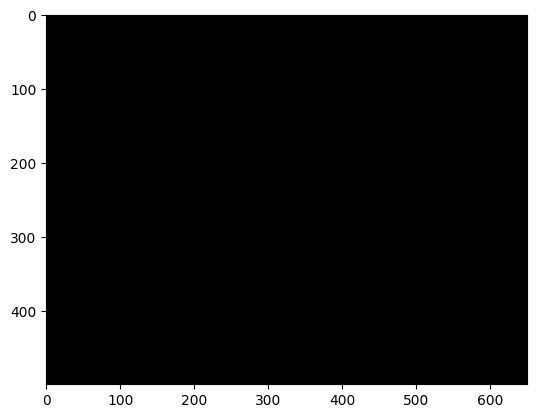

In [20]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Records from my camera

['dzien', 'dobry', 'kocham', 'ciebie', 'do', 'widziec']

In [111]:
cap = cv2.VideoCapture(0)
DATA_PATH = os.path.join('PJM_Data') 
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through actions
        for action in actions:
            # Loop through sequences aka videos
            number = 0
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
        
                # Read feed
                ret, frame = cap.read()
        
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
        
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                number += 1
                np.save(npy_path, keypoints)
        
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

## 4. Preprocess data

In [7]:
# divides data for test and train
from sklearn.model_selection import train_test_split
# convert data to one-hot encoding
from tensorflow.keras.utils import to_categorical

In [8]:
label_map = {label:num for num, label in enumerate(actions)}

In [47]:
label_map

{np.str_('dzien'): 0,
 np.str_('dobry'): 1,
 np.str_('kocham'): 2,
 np.str_('ciebie'): 3,
 np.str_('do'): 4,
 np.str_('widziec'): 5}

In [51]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [52]:
X = np.array(sequences)
X.shape 

(5760, 10, 1662)

In [57]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], shape=(5760, 6))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(288, 6)

## Build and Train Neutral Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import TensorBoard

In [61]:
log_dir = os.path.join('Logs10klatek')
tb_callback = TensorBoard(log_dir=log_dir)

In [63]:
model = Sequential([
    Input(shape=(10,1662)),  
    LSTM(64, return_sequences=True, activation='tanh'),
    LSTM(128, return_sequences=True, activation='tanh'),
    LSTM(64, return_sequences=False, activation='tanh'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(actions.shape[0], activation='softmax')  
])

In [65]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [123]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - categorical_accuracy: 0.9633 - loss: 0.1235
Epoch 2/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - categorical_accuracy: 0.9877 - loss: 0.0511
Epoch 3/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - categorical_accuracy: 0.9897 - loss: 0.0390
Epoch 4/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - categorical_accuracy: 0.9829 - loss: 0.0582
Epoch 5/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - categorical_accuracy: 0.9882 - loss: 0.0355
Epoch 6/2000
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - categorical_accuracy: 0.9846 - loss: 0.0518
Epoch 7/2000
 62/171 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - categorical_accuracy: 0.9932 - loss: 0.0239

KeyboardInterrupt: 

In [69]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 10, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 10, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,324 (6.83 MB)

 Trainable params: 596,774 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,550 (4.55 MB)

## Predictions

In [125]:
res = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [127]:
actions[np.argmax(res[1])]

np.str_('dobry')

In [129]:
actions[np.argmax(y_test[1])]

np.str_('dobry')

## 5. Save weights

In [147]:
model.save('action_99(10frames).keras')

In [25]:
# to reload model
model.load_weights('action_good(15frames).keras')

## 6. Evaulation using confusion matrix and accuracy

In [27]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [131]:
yhat = model.predict(X_train)

171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [132]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [133]:
multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

0.9937865497076024

In [134]:
yhat = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [139]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [141]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[242,   0],
        [  0,  46]],

       [[240,   1],
        [  0,  47]],

       [[233,   0],
        [  1,  54]],

       [[249,   0],
        [  1,  38]],

       [[241,   0],
        [  0,  47]],

       [[233,   1],
        [  0,  54]]])

In [143]:
accuracy_score(ytrue, yhat)

0.9930555555555556

## 7. Testing

In [31]:
from collections import Counter
from scipy import stats

In [33]:
colors = [(245,117,16), (117,245,16), (16,117,245), (16,27,246), (16,217,245), (216,217,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        percentage = f"{int(prob * 100)}%"  # Konwersja prawdopodobieństwa na procenty
        text = f"{actions[num]}: {percentage}"  # Formatowanie tekstu
        
        # Dodanie tekstu do obrazu
        cv2.putText(output_frame, text, (10, 60 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, colors[num], 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
print("Długość res:", len(res))
print("Długość actions:", len(actions))
print("Długość colors:", len(colors))

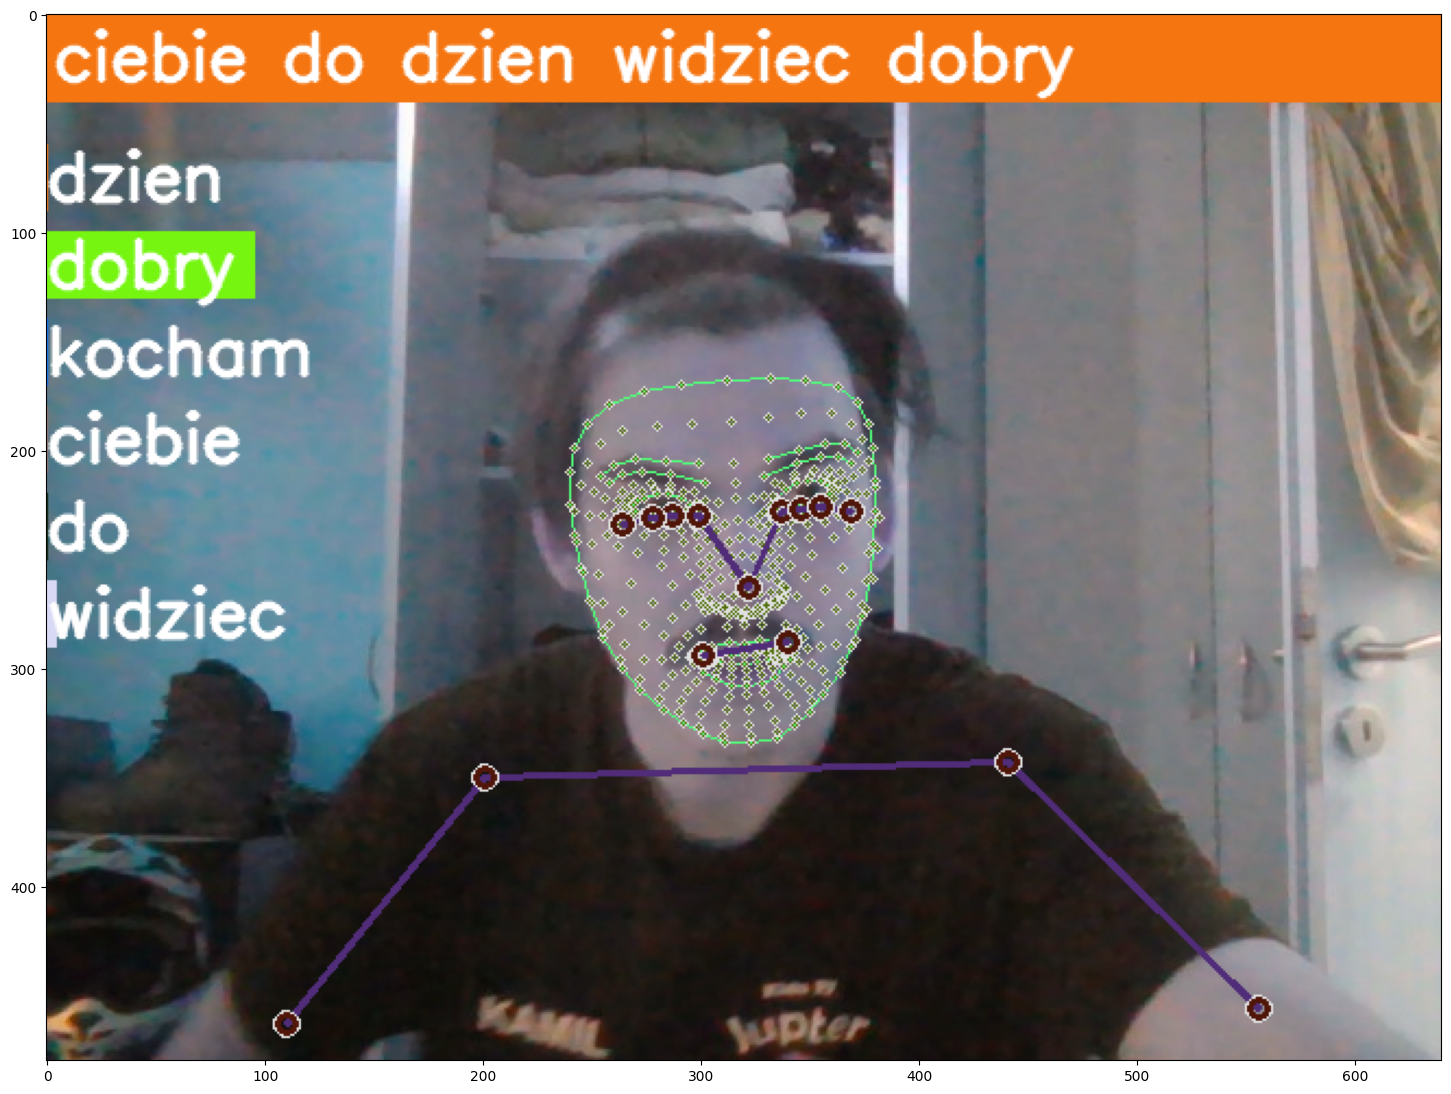

In [340]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [145]:
# 1. New detection variables
noHands = 0
sequence = []
sentence = []
predictions = []
threshold = 0.70
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

cap = cv2.VideoCapture(0)
# Set mediapipe model 
while cap.isOpened():

    # Read feed
    ret, frame = cap.read()

    # Make detections
    image, results = mediapipe_detection(frame, holistic)
    print(results)
    
    # Draw landmarks
    draw_styled_landmarks(image, results)
    
    # 2. Prediction logic
    if (not results.left_hand_landmarks) and (not results.right_hand_landmarks):
        noHands += 1
        if noHands > 20:
            break
    else:
        noHands = 0

    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-10:]
    
    if len(sequence) == 10:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        predictions.append(np.argmax(res))
        
        
    #3. Viz logic
        if np.unique(predictions[-5:])[0]==np.argmax(res): 
            if res[np.argmax(res)] > threshold: 
                
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5: 
            sentence = sentence[-5:]

        # Viz probabilities
        image = prob_viz(res, actions, image, colors)
        
    cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image, ' '.join(sentence), (3,30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
dobry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
dobry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
dobry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
ciebie
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))

In [178]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture('dobry.mp4')
DATA_PATH = os.path.join('PJM_Data') 
frames_counter = 0
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:
        check, frame = cap.read()
        
        if check:
            # Make detection
            image, results = mediapipe_detection(frame, holistic)
            image = cv2.resize(image, (650, 500))
            # Draw landmarks
            draw_styled_landmarks(image, results)

            # 2. Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-20:]
            
            if len(sequence) == 20:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))
                
                
            #3. Viz logic
                if np.unique(predictions[-15:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 
                        
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])
    
                if len(sentence) > 5: 
                    sentence = sentence[-5:]
    
                # Viz probabilities
                image = prob_viz(res, actions, image, colors)

            
            cv2.imshow("Capturing", image)
            key = cv2.waitKey(1)
        else:
            break
    
    print("Number of frames in the video: ", frames_counter)
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
do
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
do
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
do
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
do
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
do
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
do
Number of frames in the video:  0


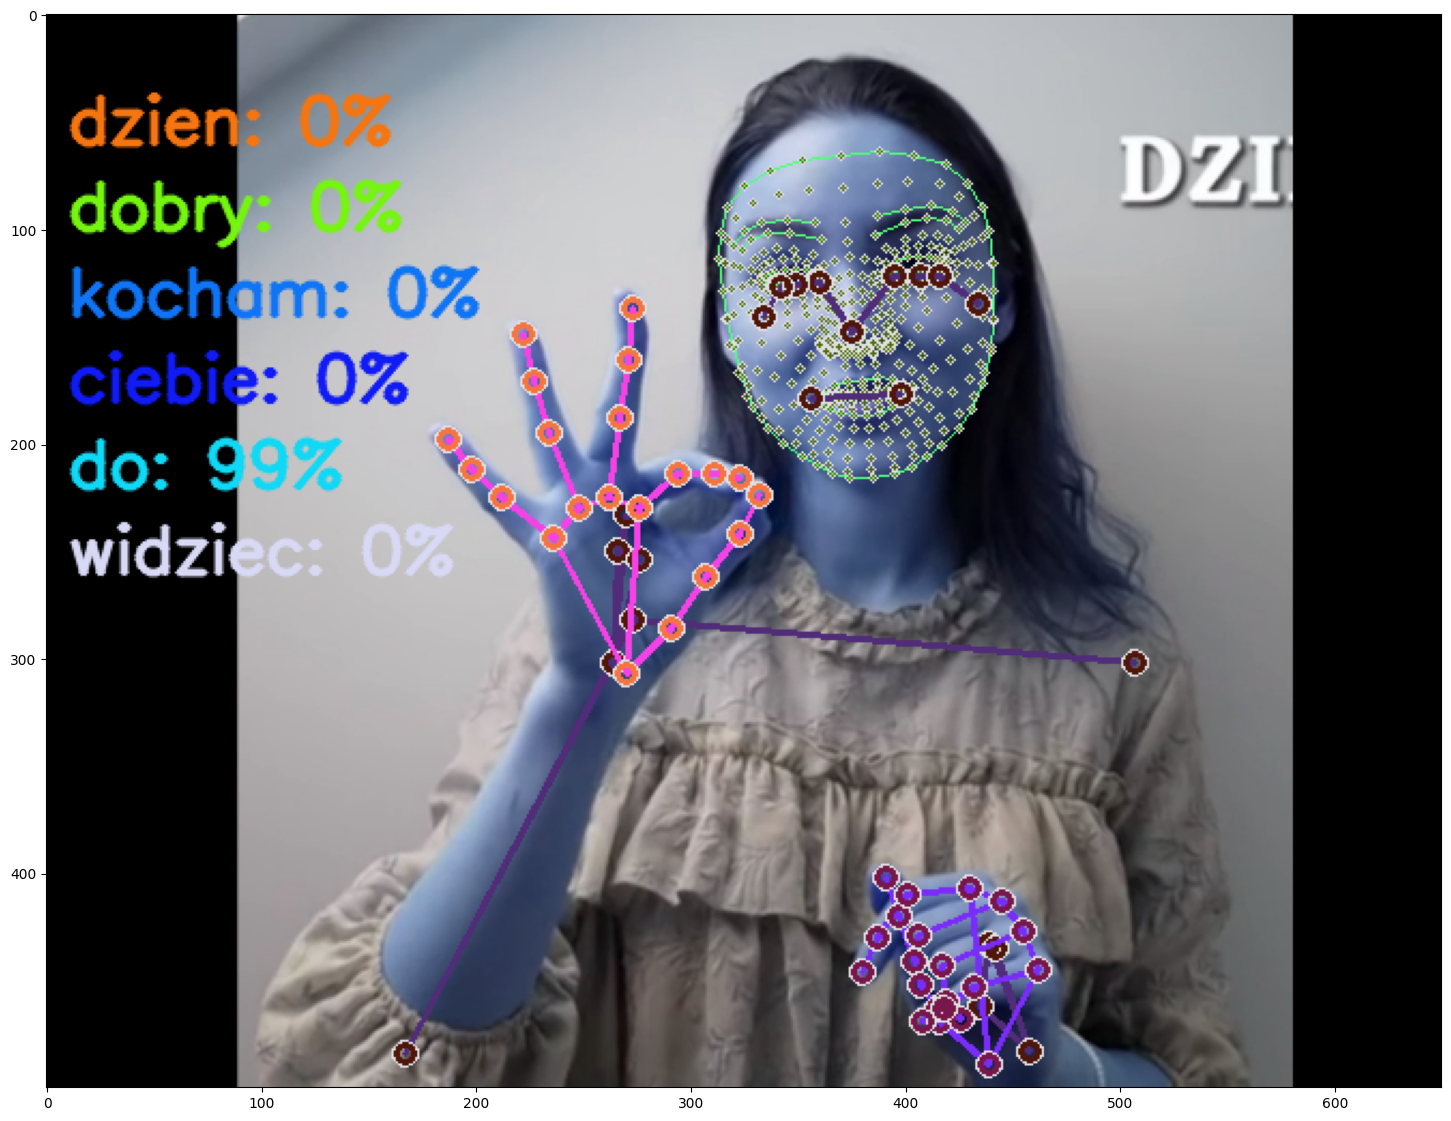

In [180]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))